Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

**Описание данных**


Данные для работы находятся в нескольких таблицах. 
**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
`id` — номер покупателя в корпоративной базе данных.

Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
`Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».

Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

`Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

`Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.

`Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

`Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

`Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.

`Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

`Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.

`Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.

`Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

`id` — номер покупателя в корпоративной базе данных.

`Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

`Выручка` — сумма выручки за период.

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
`id` — номер покупателя в корпоративной базе данных.

`Период` — название периода, во время которого зафиксировано общее время.

`минут` — значение времени, проведённого на сайте, в минутах.

**money.csv**
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

`id` — номер покупателя в корпоративной базе данных.
`Прибыль` — значение прибыли.

# Загрузка данных

In [1]:
!pip install phik -q
!pip install shap  -q


In [2]:
# импрот библиотек
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import phik

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import (OneHotEncoder, 
                                     OrdinalEncoder, 
                                     StandardScaler, 
                                     MinMaxScaler, 
                                     RobustScaler,
                                     PolynomialFeatures)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, f1_score, accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings

from scipy.spatial.distance import cityblock 
import sklearn.metrics.pairwise

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif  
import shap
from sklearn.inspection import permutation_importance


In [3]:
data_main = pd.read_csv('C:\\Users\Serg\\practicum\\table\\market_file.csv')
data_total_money = pd.read_csv('C:\\Users\\Serg\\practicum\\table\\market_money.csv')
data_mean_money = pd.read_csv('C:\\Users\Serg\\practicum\\table\\money.csv', sep=';', decimal=',')
data_time = pd.read_csv('C:\\Users\\Serg\\practicum\\table\\market_time.csv')

In [4]:
data_main

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [5]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

Видим что в в стобце `Тип сервиса` стандарт присутсвует в двух вариантах.

In [6]:
data_total_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [7]:
data_total_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [8]:
data_mean_money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [9]:
data_mean_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [10]:
data_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


Загрузили данные. Для начала, нужно данные предобработать проверить на пропуски дубликаты(явные и не явные). Привидем названия стобцов к стандарту.

# Предобработка данных

## Обработка названий стобцов 

In [12]:
data_main.columns = map(str.lower, data_main.columns)
data_main=data_main.rename(columns={'покупательская активность':'покупательская_активность','тип сервиса':'тип_сервиса',
                          'разрешить сообщать':'разрешить_сообщать'})

In [13]:
data_main.sample()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
217,215565,Снизилась,стандарт,нет,2.4,4,522,0.99,Кухонная посуда,2,5,4,4


In [14]:
data_total_money.columns = map(str.lower, data_total_money.columns)
data_mean_money.columns = map(str.lower, data_mean_money.columns)
data_time.columns = map(str.lower, data_time.columns)

In [15]:
data_total_money.sample()

,id,период,выручка
2072,216038,предыдущий_месяц,4930.0


In [16]:
data_mean_money.sample()

,id,прибыль
126,215474,4.59


In [17]:
data_time.sample()

,id,период,минут
996,215846,предыдцщий_месяц,17


Привели названия столбцов к змеиному регистру

### Поиск пропусков и дубликатов

In [18]:
#  поиск пропусков.
datalist ={'main':data_main,'total money':data_total_money,'mean money':data_mean_money,'time':data_time}
for k, v in datalist.items():
    print(k,'\n')
    print(v.isna().sum())
    print('-'*50)

main 

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64
--------------------------------------------------
total money 

id         0
период     0
выручка    0
dtype: int64
--------------------------------------------------
mean money 

id         0
прибыль    0
dtype: int64
--------------------------------------------------
time 

id        0
период    0
минут     0
dtype: int64
--------------------------------------------------


Пропусков нет.

In [19]:
#  поиск дубликатов
for k, v in datalist.items():
    print(k,'\n')
    print(v.duplicated().sum())
    print('-'*50)

main 

0
--------------------------------------------------
total money 

0
--------------------------------------------------
mean money 

0
--------------------------------------------------
time 

0
--------------------------------------------------


Явных дубликатов нет. Теперь посмотрим на неявные дубликаты.

In [20]:
data_main['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [21]:
data_main.loc[data_main['тип_сервиса']=='стандартт','тип_сервиса'] = 'стандарт'

С неявными дуббликатами тоже закончили.

Исправим ошибку в названии месяца

In [22]:
data_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [23]:
data_time.loc[data_time['период']=='предыдцщий_месяц','период'] = 'предыдущий_месяц'

**Вывод**

- Привели названия столбцов к змеиному регистру.
- Пропусков и явных дубликатов нет. Избавились от неявных дубликатов.


#  Исследовательский анализ данных

In [24]:
# функция кругового грацика
def pie(df,title):
    colors = sns.color_palette("light:#5A9")
    df.plot(kind='pie',autopct='%1.1f%%',
                                      figsize=(5,5),colors=colors,shadow=True,
                                      title = title);
    plt.show()

In [25]:
# функция для построения графиков разбиных на категориальные step =1, и количественные step=2
def analysis(df, step:int):
    if step==1:
        for i in df.select_dtypes(include='object').columns:
            print('-----',i,'-----')
            print(df[i].value_counts())
            print()
            pie(df[i].value_counts(), i);
    if step==2:        
        for i in df.select_dtypes(exclude='object').columns:
            print('------',i,'---------')
            print(df[i].describe())
            print()
            boxhist(data=df, x=i, title=i);

In [26]:
# ящик с усами
def boxplot(data, x, title):
    sns.boxplot(data=data, x=x,palette="crest");
    plt.title(title)
    plt.show()

In [27]:
# функция для построения ящика с усами и хитограмы для просмотра распределения
def boxhist(data, x, title):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    sns.boxplot(ax=axes[0],data=data, x=x,palette="crest");
    axes[0].set_xlabel(title)
    axes[0].set_title(title)


    sns.histplot(ax=axes[1],data=data, x=x, kde=True, palette="crest");
    axes[1].set_title(title);
    axes[1].set_xlabel(title)
    axes[1].axvline(data[x].mean(), c='k', ls='-', lw=2.5)
    axes[1].axvline(data[x].median(), c='orange', ls='--', lw=2.5)
    plt.xlabel(title);
    plt.show()

In [28]:
# Функция для замены выбросов на ближайшие значения
def emissions(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = 1.5 * (q3 -q1)
    df.loc[df[column]>q3+iqr, column]=q3+iqr
    df.loc[df[column]<q1-iqr, column]=q1-iqr
    return df

## Исследование категориальных признаков data_main

----- покупательская_активность -----
покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64



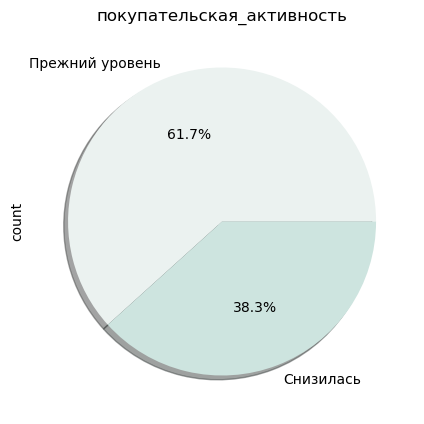

----- тип_сервиса -----
тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64



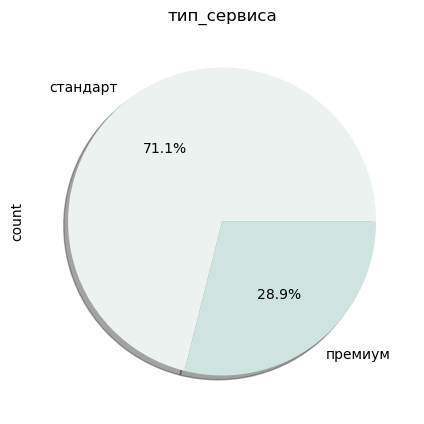

----- разрешить_сообщать -----
разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64



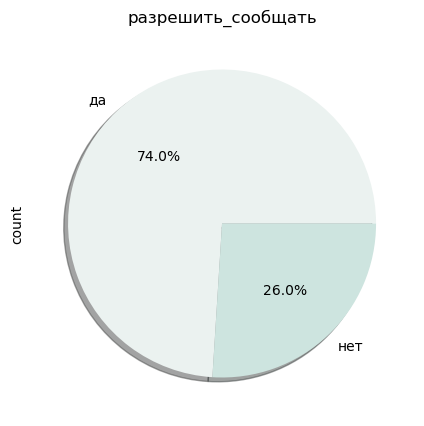

----- популярная_категория -----
популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64



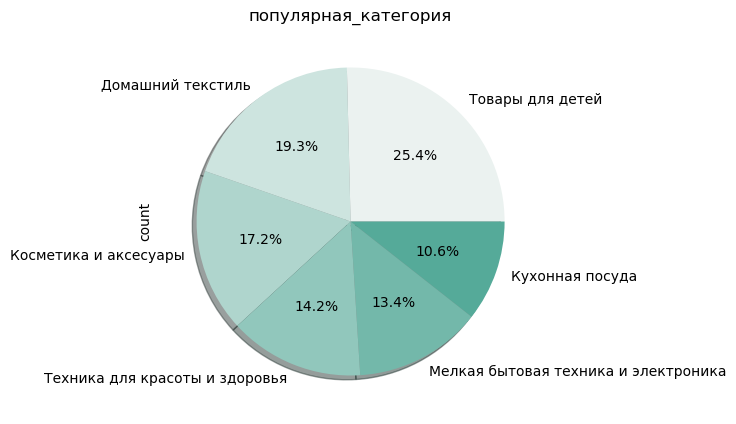

In [29]:
analysis(data_main, step=1)

Выводы по графикам:
1. Покупательская активность снизилась у 38.3%  или у 498  клиентов.
2. Премиум подписку имеют 376 клиентов. Это 28.9% от числа всех клиентов.
3. Разрешили сообщать дополнительные предложения 962 клиента. Что составляет 74%
4. Самая популярная категория `Товары для детей`- 25,4% от общего числа. Популярна у 330 клиентов.
   Самая редкая категория `Кухонная посуда` - 10,6%. Популярна у 138 клиентов.


## Исследование количественных признаков data_main

------ маркет_актив_6_мес ---------
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


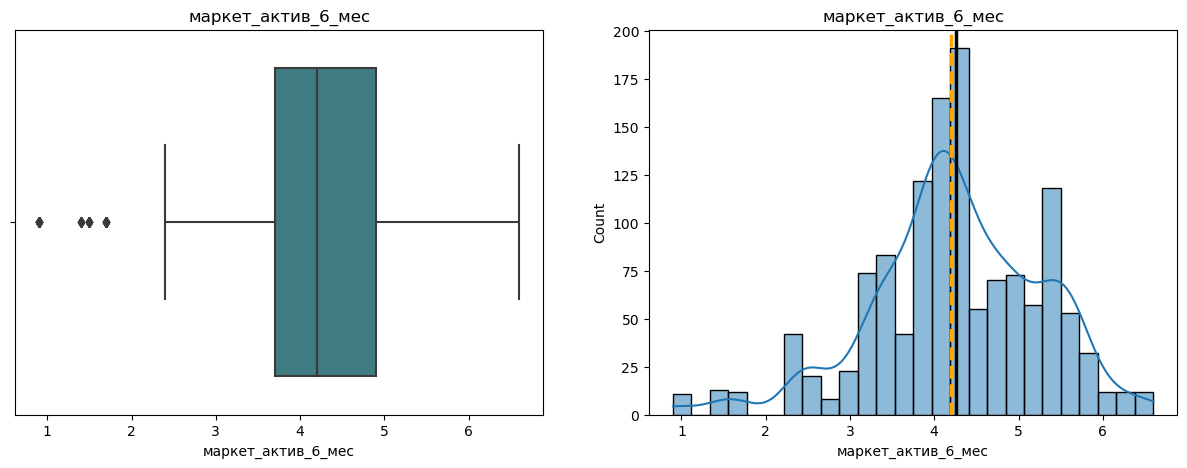

------ маркет_актив_тек_мес ---------
count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


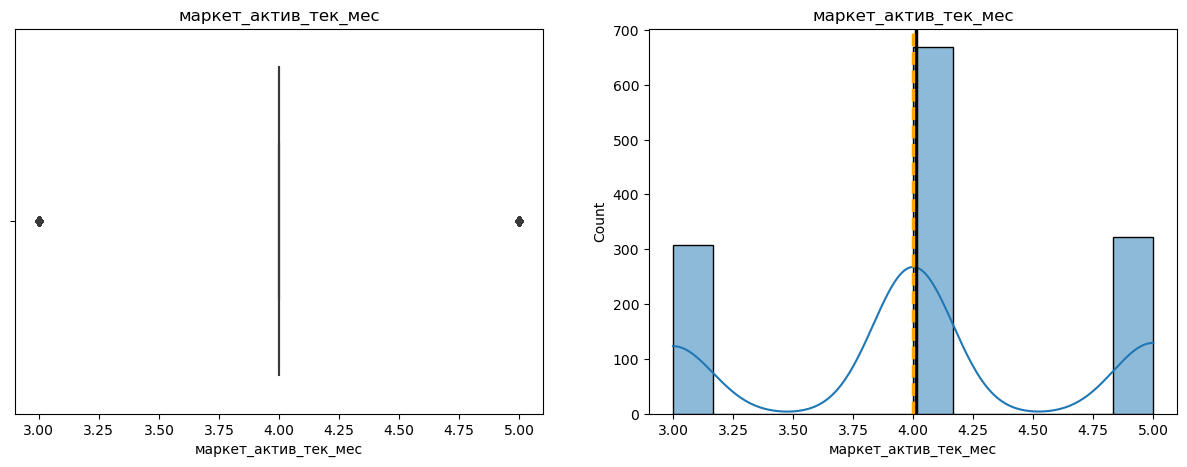

------ длительность ---------
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


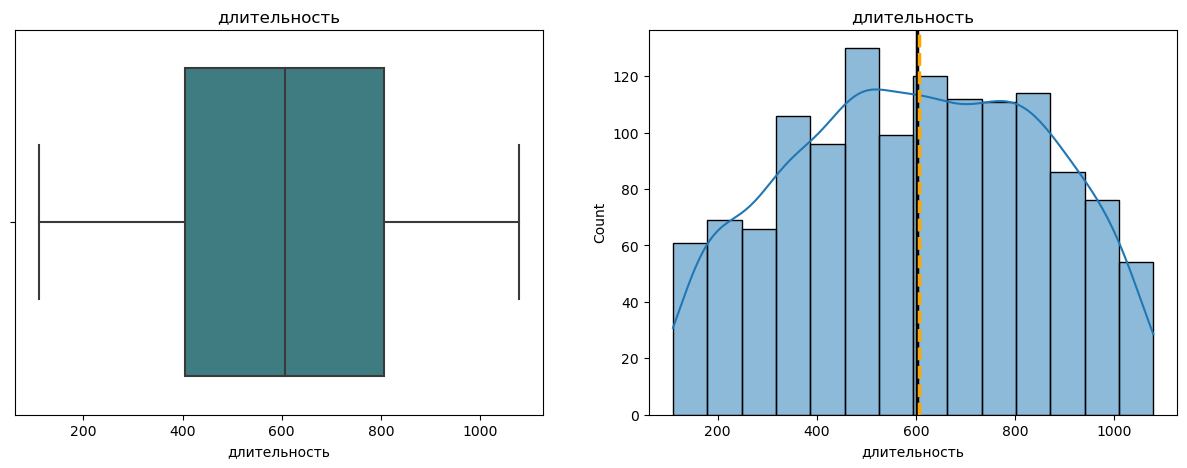

------ акционные_покупки ---------
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


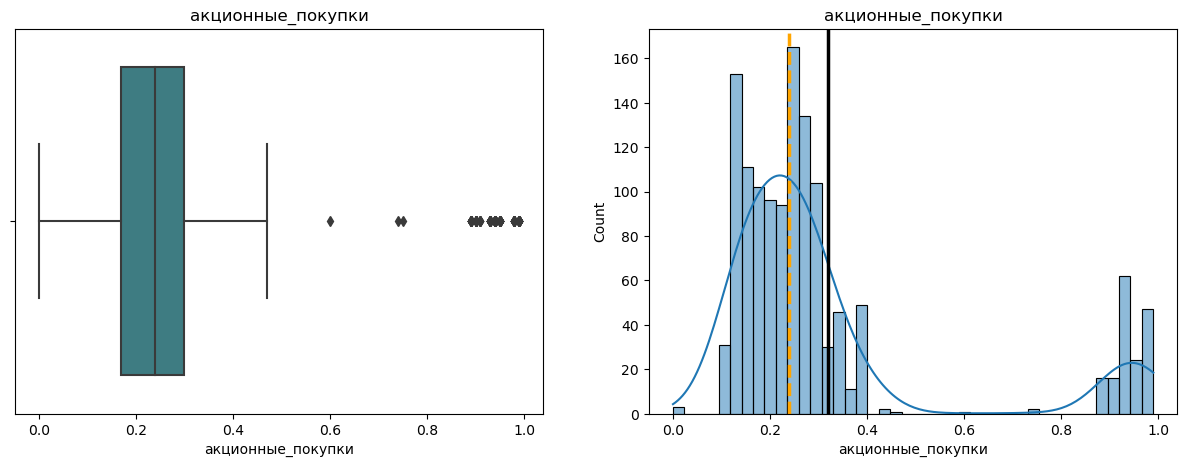

------ средний_просмотр_категорий_за_визит ---------
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


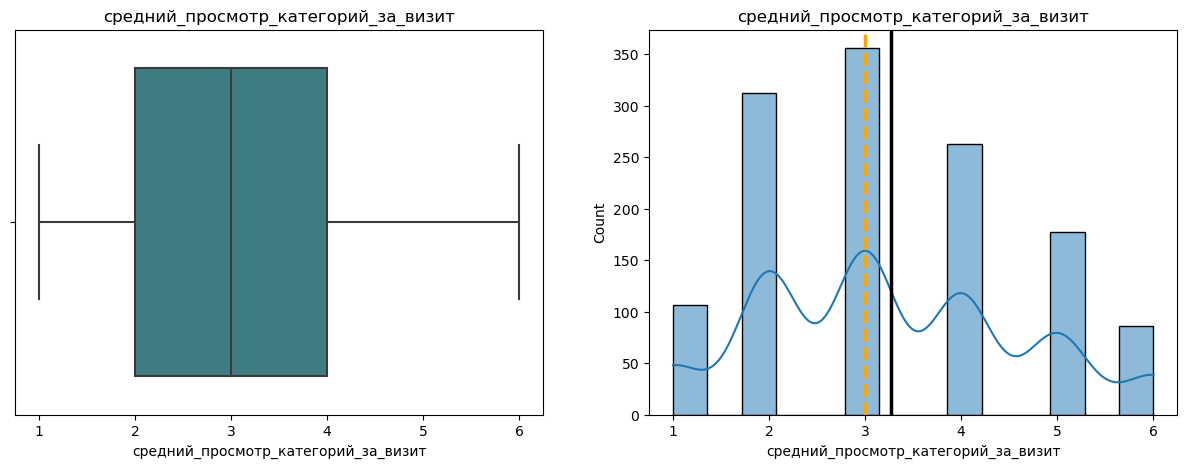

------ неоплаченные_продукты_штук_квартал ---------
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


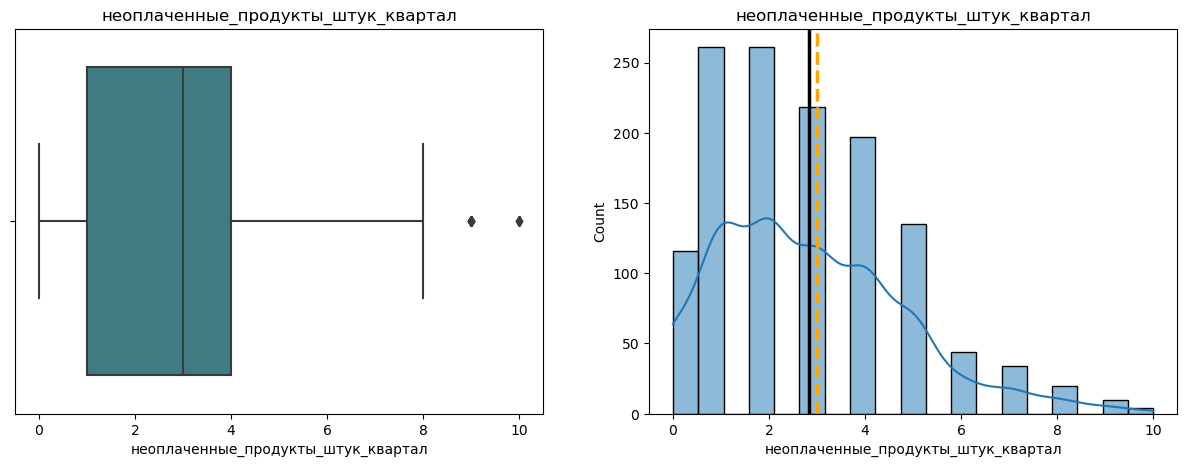

------ ошибка_сервиса ---------
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


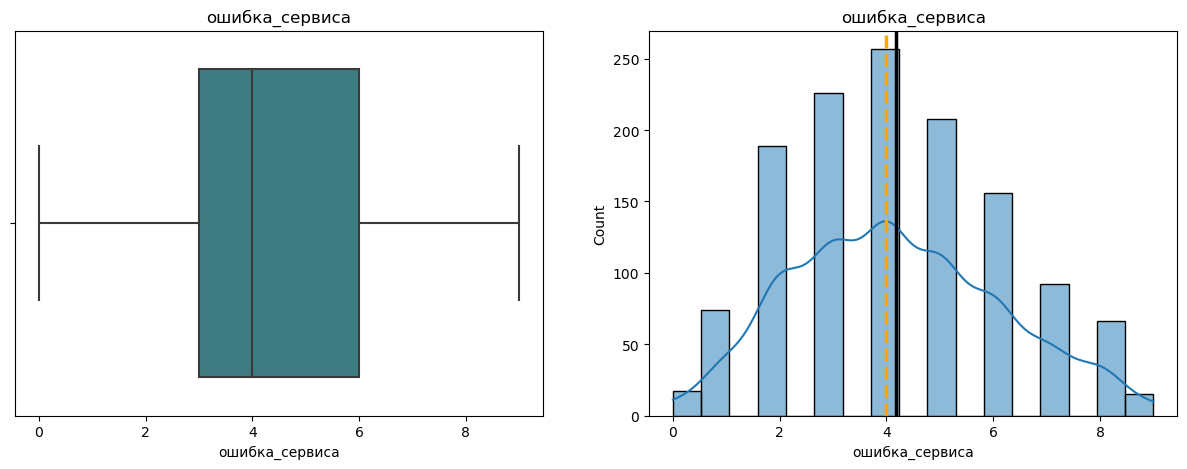

------ страниц_за_визит ---------
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


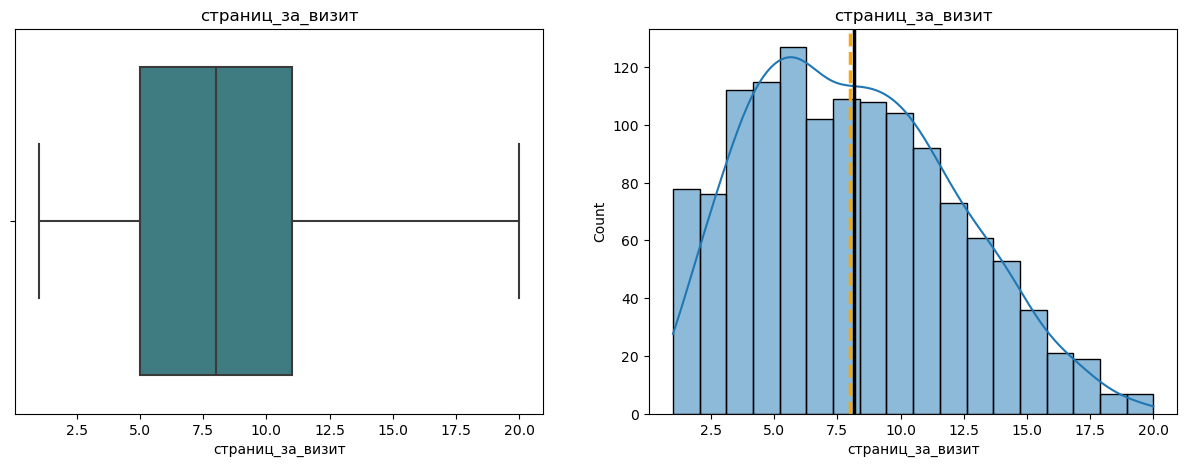

In [30]:
analysis(data_main.drop('id', axis=1), step=2)

В некоторых признаках присутсвуют выбросы. Из всех признаков ненормально распределены следующие:
- маркет_актив_тек_мес
- акционные_покупки
- средний_просмотр_категорий_за_визит

### Исследование количественных  data_total_money

------ выручка ---------
count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


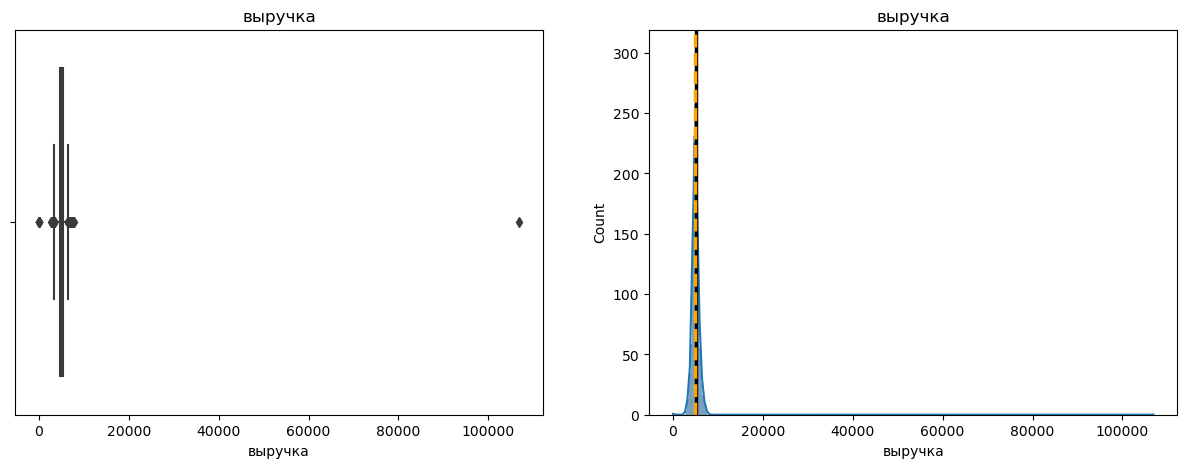

In [31]:
analysis(data_total_money.drop('id', axis=1), step=2)

Присутстувует анамально большое значение, в будущем удалим его.

### Исследование количественных  data_mean_money

------ прибыль ---------
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


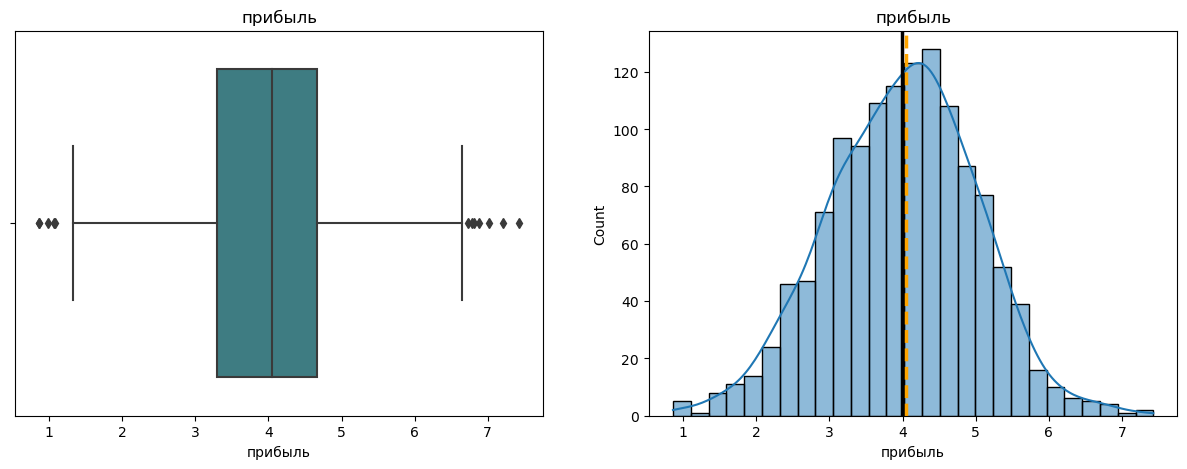

In [32]:
analysis(data_mean_money.drop('id', axis=1), step=2)

Нормально распределенно. Присутсвуют выбросы.

### Исследование количественных  data_time

------ минут ---------
count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64



Ignoring `palette` because no `hue` variable has been assigned.


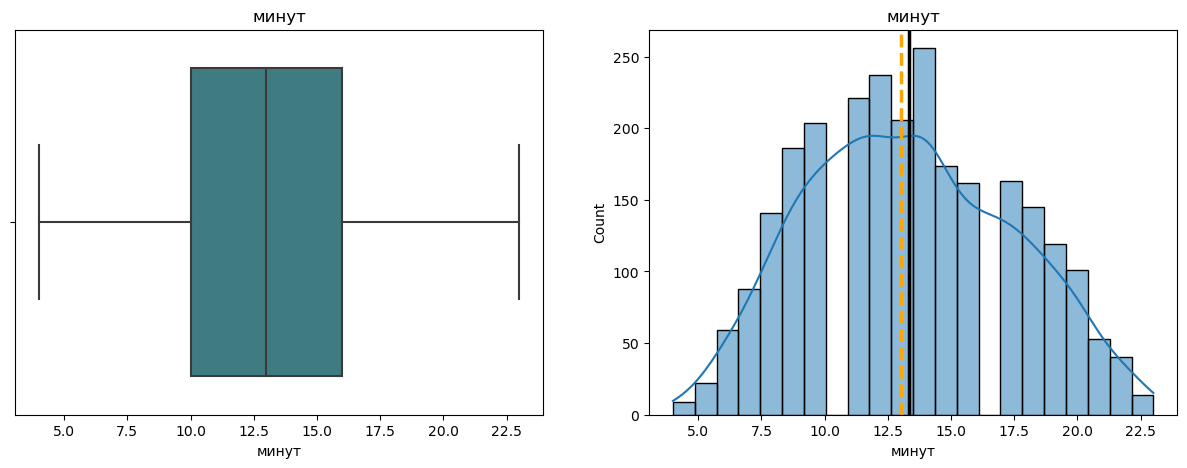

In [33]:
analysis(data_time.drop('id', axis=1), step=2)

Выбросов нет, распределенно нормально.

### Отберем клиентов с покупательской активностью не менее трёх месяцев

In [34]:
id_list = data_total_money.loc[data_total_money['выручка'] ==0,'id']

In [35]:
# Удалим найденые id клиентов
for i in id_list.unique():
    data_total_money = data_total_money.loc[data_total_money['id']!=i]
    data_main = data_main.loc[data_main['id']!=i]

In [36]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                     

Удалили клиентов с активностью менее 3 месецев.

### Объединение таблиц

In [37]:
# создадим сводные таблицы, чтобы превратить строки в столбцы
pt=data_total_money.pivot_table(index='id', columns ='период', values='выручка')
pt.columns=['выручка_предыдущий_месяц','выручка_препредыдущий_месяц','выручка_текущий_месяц']
pt2=data_time.pivot_table(index='id', columns ='период', values='минут')
pt2.columns=['время_предыдущий_месяц','время_текущий_месяц']

In [38]:
# объеденим главную таблицу со сводными
data_main = data_main.merge(pt, on='id',how ='left')
data_main = data_main.merge(pt2, on='id', how='left')

Посмотрим на результат

In [39]:
data_main.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10


In [40]:
data_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1297 non-null   int64  
 1   покупательская_активность            1297 non-null   object 
 2   тип_сервиса                          1297 non-null   object 
 3   разрешить_сообщать                   1297 non-null   object 
 4   маркет_актив_6_мес                   1297 non-null   float64
 5   маркет_актив_тек_мес                 1297 non-null   int64  
 6   длительность                         1297 non-null   int64  
 7   акционные_покупки                    1297 non-null   float64
 8   популярная_категория                 1297 non-null   object 
 9   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 11  ошибка_сервиса                

### Избавимся от выбросов

In [41]:
emiss = ['маркет_актив_6_мес','акционные_покупки',
         'неоплаченные_продукты_штук_квартал','выручка_предыдущий_месяц','выручка_текущий_месяц']
for i in emiss:
    emissions(data_main, i) # функция которая приводит выбросы к значениям на усах

### Корреляционный анализ

In [42]:
#col_num = list(X.select_dtypes(exclude='object').columns)
#sns.pairplot(data_main[col_num])

In [43]:
# таблица корреляции
cf = data_main.phik_matrix() 
cf.style.background_gradient(cmap='Blues')

interval columns not set, guessing: ['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'время_предыдущий_месяц', 'время_текущий_месяц']


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,время_предыдущий_месяц,время_текущий_месяц
id,1.000000,0.984523,0.115160,0.004809,0.436286,0.000000,0.024118,0.557639,0.169316,0.354388,0.317935,0.201949,0.608039,0.229811,0.417827,0.181422,0.564727,0.471939
покупательская_активность,0.984523,1.000000,0.132247,0.000000,0.504259,0.000000,0.099820,0.685027,0.298036,0.539221,0.389483,0.223697,0.748769,0.223647,0.493370,0.198742,0.685078,0.575662
тип_сервиса,0.115160,0.132247,1.000000,0.286278,0.075255,0.044796,0.404746,0.027478,0.066285,0.186635,0.110982,0.076182,0.100832,0.000000,0.064912,0.070862,0.131084,0.000000
разрешить_сообщать,0.004809,0.000000,0.286278,1.000000,0.051676,0.051971,0.253618,0.000000,0.071769,0.069322,0.143362,0.020464,0.041128,0.000000,0.000000,0.066672,0.042350,0.000000
маркет_актив_6_мес,0.436286,0.504259,0.075255,0.051676,1.000000,0.055205,0.000000,0.363728,0.116445,0.199206,0.186608,0.121232,0.337510,0.096661,0.287760,0.066302,0.325009,0.233309
маркет_актив_тек_мес,0.000000,0.000000,0.044796,0.051971,0.055205,1.000000,0.177132,0.009127,0.136175,0.246726,0.169479,0.116310,0.000000,0.044260,0.000000,0.000000,0.106879,0.062485
длительность,0.024118,0.099820,0.404746,0.253618,0.000000,0.177132,1.000000,0.000000,0.000000,0.190417,0.111671,0.188244,0.120363,0.105635,0.099332,0.158729,0.044660,0.107206
акционные_покупки,0.557639,0.685027,0.027478,0.000000,0.363728,0.009127,0.000000,1.000000,0.081277,0.211371,0.206938,0.000000,0.431671,0.078940,0.275387,0.172200,0.406106,0.354420
популярная_категория,0.169316,0.298036,0.066285,0.071769,0.116445,0.136175,0.000000,0.081277,1.000000,0.225622,0.246999,0.000000,0.160623,0.218880,0.047188,0.256126,0.195219,0.089923
средний_просмотр_категорий_за_визит,0.354388,0.539221,0.186635,0.069322,0.199206,0.246726,0.190417,0.211371,0.225622,1.000000,0.337074,0.069908,0.262610,0.078920,0.176040,0.097790,0.159393,0.182708


Мультиколлинеарность есть только между целевым признаком и id. Но перед моделированием столбец id будет удален.

# Пайплан моделирования

### подготовка данных и дисбаланс классов.

In [44]:
# сделаем из маркетного актива текущего месяца категориальный признак
RANDOM_STATE = 42
TEST_SIZE = 0.25
data_main['маркет_актив_тек_мес'] = data_main['маркет_актив_тек_мес'].astype('object')

#data_main['неоплаченные_продукты_штук_квартал'] = data_main['неоплаченные_продукты_штук_квартал'].apply(
   # lambda x: 'меньше средьнего' if x<=data_main['неоплаченные_продукты_штук_квартал'].mean() else 'больше среднего')

#data_main['средний_просмотр_категорий_за_визит']=data_main['средний_просмотр_категорий_за_визит'].apply(
  #  lambda x:'меньше средьнего' if x<=data_main['средний_просмотр_категорий_за_визит'].mean() else 'больше среднего')

#data_main['ошибка_сервиса'] = data_main['ошибка_сервиса'].apply(
  #  lambda x:'меньше средьнего' if x<=data_main['ошибка_сервиса'].mean() else 'больше среднего')

In [45]:
data_main.покупательская_активность.value_counts()

покупательская_активность
Прежний уровень    802
Снизилась          495
Name: count, dtype: int64

In [46]:
train_df, test_df = train_test_split(data_main, random_state=RANDOM_STATE, stratify=data_main['покупательская_активность'])

In [47]:
# проверяем баланс данных в тренировочном датасете
print(f'Тренировочные данные до сэмплирования:\n{train_df.покупательская_активность.value_counts()}')

# вычисляем размера дисбаланса: узнаём, насколько данных мажорного класса больше
delta = train_df.покупательская_активность.value_counts()['Прежний уровень'] - train_df.покупательская_активность.value_counts()['Снизилась']

# отбираем и копируем объекты минорного класса
# их количество будет равно разнице между числом объектов двух классов
sampled_down = train_df.query("покупательская_активность=='Снизилась'").sample(delta, replace=True)

# объединяем исходные данные с новыми
df_sampled = pd.concat([train_df, sampled_down])

# перемешиваем данные
df_sampled = df_sampled.sample(frac=1)

# проверка баланса данных в сэмплированном тренировочном датасете
print(f'Тренировочные данные после сэмплирования:\n{df_sampled.покупательская_активность.value_counts()}')

Тренировочные данные до сэмплирования:
покупательская_активность
Прежний уровень    601
Снизилась          371
Name: count, dtype: int64
Тренировочные данные после сэмплирования:
покупательская_активность
Снизилась          601
Прежний уровень    601
Name: count, dtype: int64


In [48]:
df_sampled['покупательская_активность']=df_sampled['покупательская_активность'].apply(lambda x: 1 if x =='Снизилась' else 0)
X_train = df_sampled.drop(['покупательская_активность', 'id'], axis=1)
y_train = df_sampled['покупательская_активность']
X_test = test_df.drop(['покупательская_активность', 'id'], axis=1)
y_test = test_df['покупательская_активность']

### Создадим пайплайн. 

In [49]:
#col_ohe = ['популярная_категория','средний_просмотр_категорий_за_визит',
 #         'маркет_актив_тек_мес','неоплаченные_продукты_штук_квартал','ошибка_сервиса']
col_ohe = ['популярная_категория','маркет_актив_тек_мес']
col_all = data_main.columns
col_ord = ['тип_сервиса','разрешить_сообщать']
col_num = list(X_train.select_dtypes(exclude='object').columns)

In [50]:
# пайплан с заменой пропусков и кодирования с помощью OneHotEncoder
pipe_ohe = Pipeline(
    [ # Замена возможных пропусков на самое часто втречающиеся значение.
     ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        # Кодирование данных с помощью OneHotEncoder
     ( 'ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse=False))
    ]
) 
pipe_ord = ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ord',  OrdinalEncoder(categories=[
                    ['стандарт','премиум'], 
                    ['нет','да']
                    ], 
        handle_unknown='use_encoded_value', unknown_value=np.nan )),
        
        ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]) 

In [51]:
# пайплан объеденяющий шаги по маштабированию
preprocessor = ColumnTransformer(
    [('ohe', pipe_ohe, col_ohe),
    ('ord', pipe_ord, col_ord),
    ('num', MinMaxScaler(), col_num)], 
    remainder='passthrough') 

In [52]:
# финальный пайплан.
pipe_final = Pipeline(
    [('preprocessor', preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))]) 

Задаем гиперпараметры.

In [53]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2,10),
        'models__min_samples_split': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(3, 10),
        'models__metric':['cityblock','euclidean','l1','l2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE)],
        'models__C': [0.1,  0.3, 0.5,0.8,1,5,10],
        'models__penalty':['l1','l2','elasticnet','none'],
        'models__solver':['liblinear', 'sag', 'saga'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
     {
        'models': [SVC(
            random_state=RANDOM_STATE)],
        'models__kernel':['linear','sigmoid''rbf'],
        'models__C':[1, 10, 100],
        'models__gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    },
    {
        'models': [SVC(
            random_state=RANDOM_STATE,kernel = 'poly')],
        'models__degree':range(2,9),
        'models__gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),RobustScaler(), 'passthrough']  
    }
]

Найдем лучшую Модель с использованием  RandomizedSearchCV.
Метрику выберем ROC_AUC - эта метрика позволяет оценить качество модели с учётом всех возможных порогов. Классы были сбалансированы.

In [54]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)
warnings.filterwarnings('ignore')
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              sparse=False))]),
                                                                               ['популярная_категория',
                                                                                'маркет_актив_тек_мес']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_befo...
                                         'models__kernel': ['linear',
                                                            'sigmoidrbf'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='poly',
                                                        random_state=42)],
                                         'models__degree': range(2, 9),
                                         'models__gamma': [0.1, 0.2, 0.3, 0.4,
                                                           0.5, 0.6, 0.7, 0.8,
                                                           0.9],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               RobustScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [55]:

print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

# проверьте работу модели на тестовой выборке
# рассчитайте прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['популярная_категория',
                                                   'маркет_актив_тек_мес']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                 

Опредлили лучшую модель.

In [56]:
# значения гипер параметров лучшей модели
result = pd.DataFrame(randomized_search.cv_results_)
ind=result.index[result['rank_test_score']==1]
result.loc[ind[0],'params']


{'preprocessor__num': MinMaxScaler(),
 'models__solver': 'saga',
 'models__penalty': 'l1',
 'models__C': 0.1,
 'models': LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')}

In [57]:
# объевляем модель
model = LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
X_train_q = pd.DataFrame(
    preprocessor.fit_transform(X_train),
    columns=preprocessor.get_feature_names_out()    
)
X_test_q = pd.DataFrame(
    preprocessor.transform(X_test),
    columns=preprocessor.get_feature_names_out()    
) 
model.fit(X_train_q,y_train)

LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')

Определим при скольких признаках модель выдает лучший результат

**Вывод**
Убрали дисбаланс классов. С помощью пайплана определили лучшую модель с параматреами:
- модель: LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
- метод масштабирования :MinMaxScaler()
- solver: 'saga',
- penalty: 'l1',
- C': 0.1,

# Анализ важности признаков

In [58]:
# поиск максимального количества признаков для самой лучшей оценки
score=0
k=0
lens=len(X_test_q.columns)

for i in range(len(X_test_q.columns)):
    selector = SelectKBest(f_classif, k=i+1)
    selector.fit(X_train_q, y_train)
    
    features_names = X_train_q.columns[selector.get_support(indices=True)]
    
    X_train_new = X_train_q[list(features_names)]
    X_test_new = X_test_q[list(features_names)]

    model = model
    model.fit(X_train_new, y_train)

    roc = roc_auc_score(y_test, model.predict(X_test_new))
   
    if roc > score:
        score=roc
        k=i+1
        
print('Всего признаков', lens)
print(f'лучшая метрика равна {score} при {k} признаках')

selector = SelectKBest(f_classif, k=k)
selector.fit(X_train_q, y_train)
    
features_names = X_train_q.columns[selector.get_support(indices=True)]
    
X_train_final = X_train_q[list(features_names)]
X_test_final= X_test_q[list(features_names)]

model = model
model.fit(X_train_final, y_train)

Всего признаков 21
лучшая метрика равна 0.8621409083614188 при 9 признаках


LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')

Для лучшей оценки нужны 9 признаков

### Метод SHAP

In [59]:
# коментрий что бы не считать каждый раз
# визуализируем вклад признаков в каждое предсказание модели.
explainer = shap. PermutationExplainer(model.predict, X_train_final)
shap_values = explainer(X_test_final)

PermutationExplainer explainer: 326it [00:13,  8.21it/s]                                                               


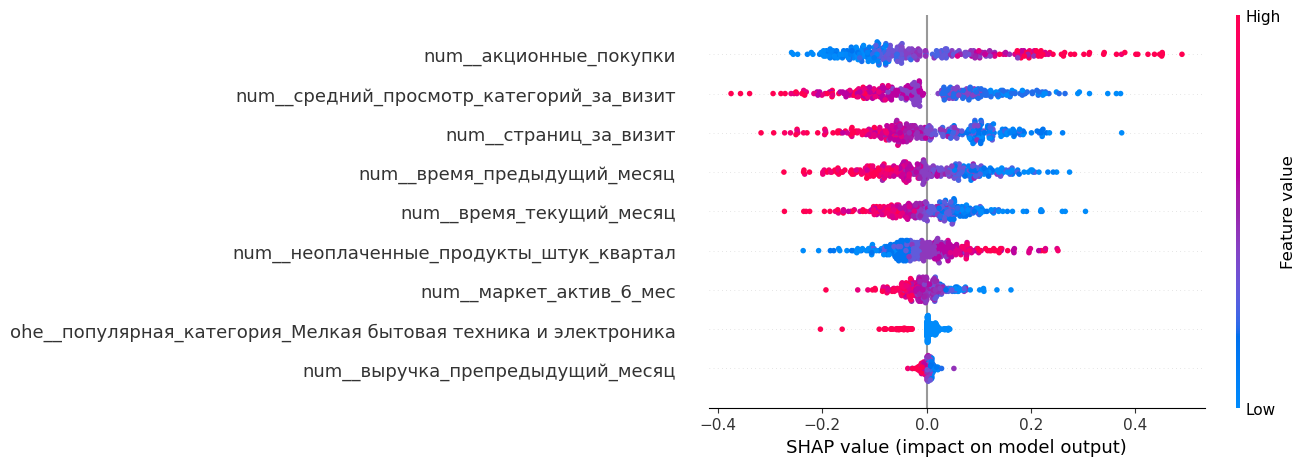

In [60]:

shap.plots.beeswarm(shap_values)

`1 класс - Снизилось. 0-прежний уровень`

Можем сделать вывод, что больше всего в сторону 1 класса влияет `признак акционные покупки`, `неоплаченные продукты за квартал`.
В сторону 0 класса больше всего влияет`время проведенное на сайте за  2 месяца`,`Средний просмотр категорий за визит` , `страниц за визит`.


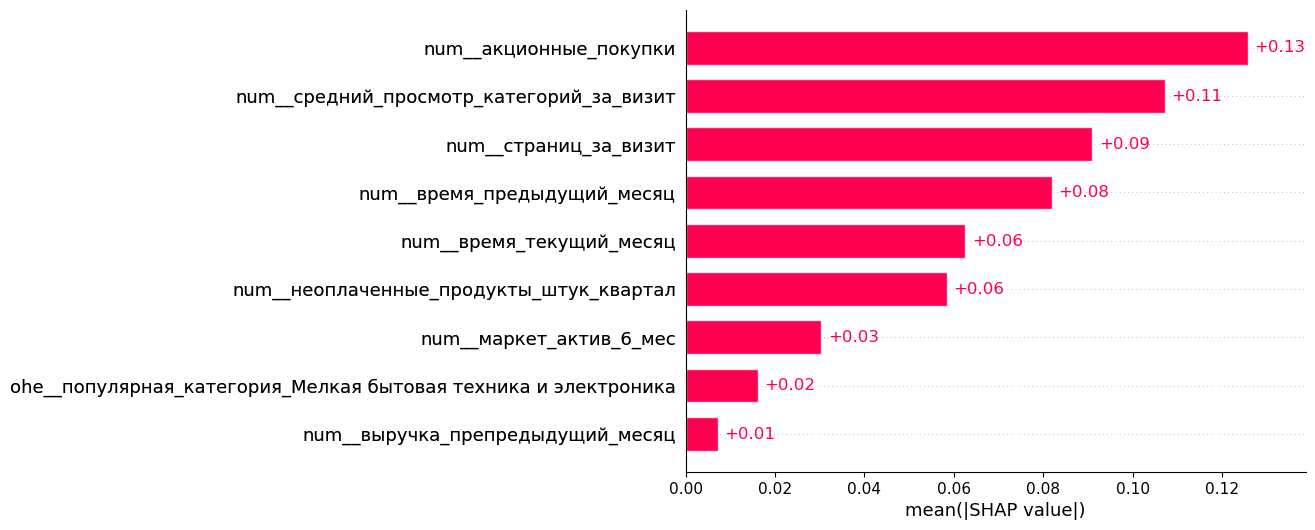

In [61]:
shap.plots.bar(shap_values)

### выводы о значимости признаков:

Сильнее всего на результат влияют признаки  `акционных покупок` и `время проведенное на сайте за предыдущий месяц`. Меньше всего влияют признак популярная категория: `выручка за препредыдущий месяц` и `здоровья и мелкая бытовая техника`.

Для бизнес решений можно сделать выводы:

Что клиенты склоны к снижению активности:
- если у них высокий % акционных покупок
- много неоплаченных товаров

Признаки по которым можно отнести клиентов к прежнему уровню активности:
- большое число просмотров страниц
- время проведенное на сайте за последние два месяца


# Сегментация покупателей

In [62]:
def scatter(data,x,y,hue, xlabel, ylabel, title):
    plt.figure(figsize=(5,5))
    sns.scatterplot(data=data, x=x,y=y, hue=hue, palette="crest");
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

### создадим финальную таблицу. 

Для начала объединим таблицы( основную, прибыльность покупателей и результат предсказания модели.

In [63]:
final_data = data_main.merge(data_mean_money, on='id', how='left').copy()
data_main = data_main.drop(['id','покупательская_активность'], axis=1)

In [64]:
X = pd.DataFrame(
    preprocessor.transform(data_main),
    columns=preprocessor.get_feature_names_out())
X = X[list(features_names)]
pred = model.predict_proba(X)

In [65]:
# добавляем  оценку модели к финальной таблице
final_data.insert(0,'оценка_модели', pred[:,1])

In [66]:
final_data['сумма_выручки'] = final_data['выручка_препредыдущий_месяц'] + \
final_data['выручка_предыдущий_месяц'] + final_data['выручка_текущий_месяц']
final_data = final_data.drop(['выручка_предыдущий_месяц','выручка_текущий_месяц','выручка_препредыдущий_месяц'],axis=1)

In [67]:
final_data.head()

,оценка_модели,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_предыдущий_месяц,время_текущий_месяц,прибыль,сумма_выручки
0,0.823817,215349,Снизилась,премиум,да,4.4,4,819,0.495,Товары для детей,4,4.0,2,5,12,10,4.16,14659.6
1,0.333665,215350,Снизилась,стандарт,нет,4.9,3,539,0.140,Домашний текстиль,5,2.0,1,5,8,13,3.13,15341.9
2,0.661460,215351,Снизилась,стандарт,да,3.2,5,896,0.495,Товары для детей,5,0.0,6,4,11,13,4.87,17561.4
3,0.886455,215352,Снизилась,стандарт,нет,5.1,3,1064,0.495,Товары для детей,3,2.0,3,2,8,11,4.21,16274.0
4,0.598385,215353,Снизилась,стандарт,да,3.3,4,762,0.260,Домашний текстиль,4,1.0,1,4,10,10,3.95,15251.0


### сегментация пользователей

Проведем сегментацию  по пользователям приносящие прибыль выше среднего среднего и для которых модель предсказала снижение.

In [68]:
segment_one = final_data.loc[(final_data['оценка_модели']>0.5) &(final_data['прибыль']>final_data['прибыль'].mean())]

In [69]:
segment_one.head()

,оценка_модели,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_предыдущий_месяц,время_текущий_месяц,прибыль,сумма_выручки
0,0.823817,215349,Снизилась,премиум,да,4.4,4,819,0.495,Товары для детей,4,4.0,2,5,12,10,4.16,14659.6
2,0.661460,215351,Снизилась,стандарт,да,3.2,5,896,0.495,Товары для детей,5,0.0,6,4,11,13,4.87,17561.4
3,0.886455,215352,Снизилась,стандарт,нет,5.1,3,1064,0.495,Товары для детей,3,2.0,3,2,8,11,4.21,16274.0
7,0.800065,215356,Снизилась,стандарт,да,4.2,4,192,0.140,Косметика и аксесуары,2,2.0,1,3,6,7,4.93,13145.9
9,0.745467,215360,Снизилась,премиум,да,3.9,3,623,0.350,Кухонная посуда,3,1.0,4,7,9,6,4.55,16694.4


Проведем анализ категориальных признаков

In [70]:
nums = list(final_data.select_dtypes(exclude='object').columns)

----- покупательская_активность -----
покупательская_активность
Снизилась          213
Прежний уровень     37
Name: count, dtype: int64



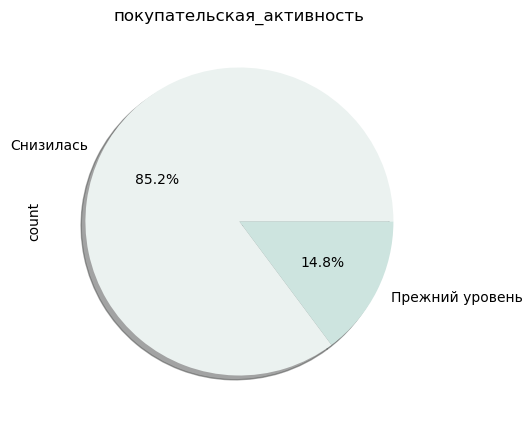

----- тип_сервиса -----
тип_сервиса
стандарт    168
премиум      82
Name: count, dtype: int64



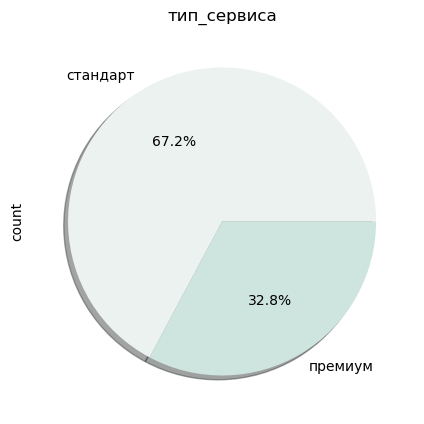

----- разрешить_сообщать -----
разрешить_сообщать
да     188
нет     62
Name: count, dtype: int64



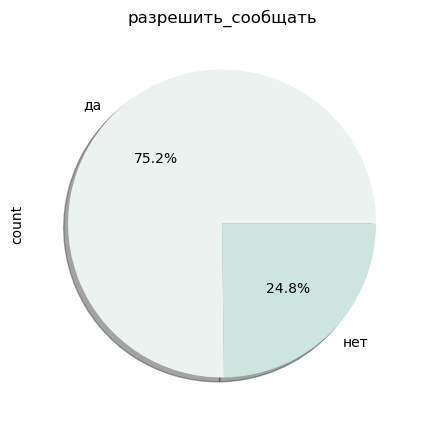

----- маркет_актив_тек_мес -----
маркет_актив_тек_мес
4    135
5     63
3     52
Name: count, dtype: int64



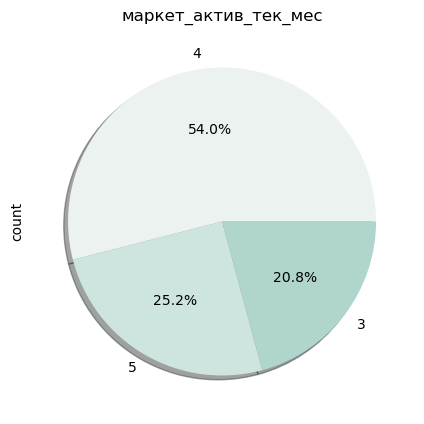

----- популярная_категория -----
популярная_категория
Товары для детей                        79
Косметика и аксесуары                   60
Домашний текстиль                       38
Кухонная посуда                         35
Техника для красоты и здоровья          25
Мелкая бытовая техника и электроника    13
Name: count, dtype: int64



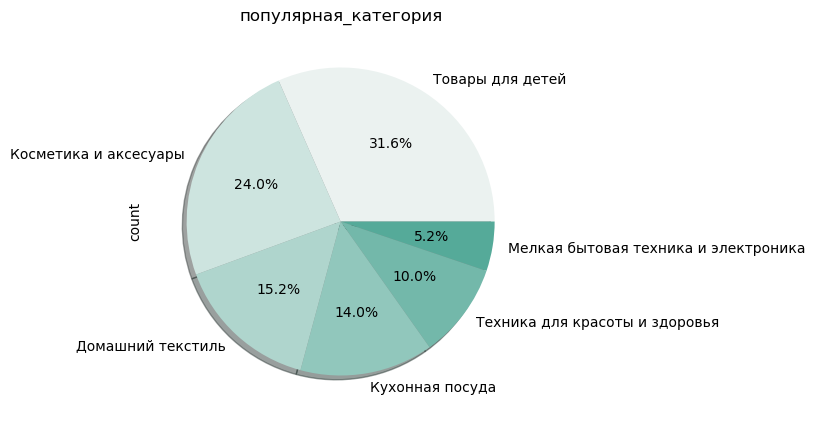

In [71]:
analysis(segment_one, step=1)

Как видно из графиков в этой категории пользователей  имеют сниженную покупательскую активность. 85,7%

При этом 67.7% имеют стандартный тип сервиса.
Разрешили сообщать предложения 74.7%

Самая популярная категория товаров -Товары для детей


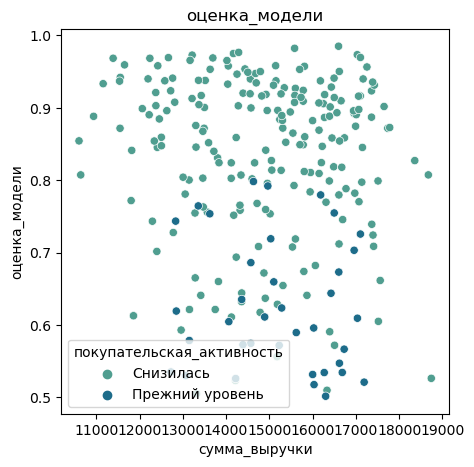

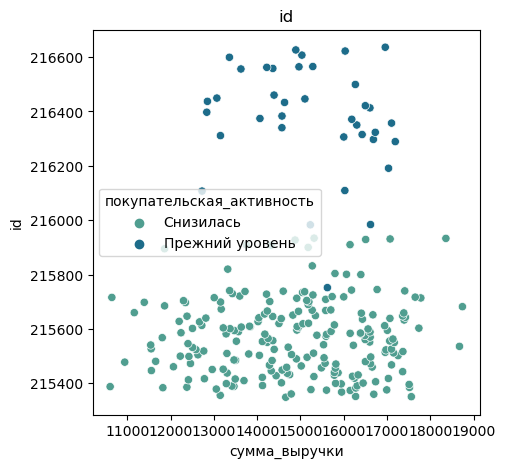

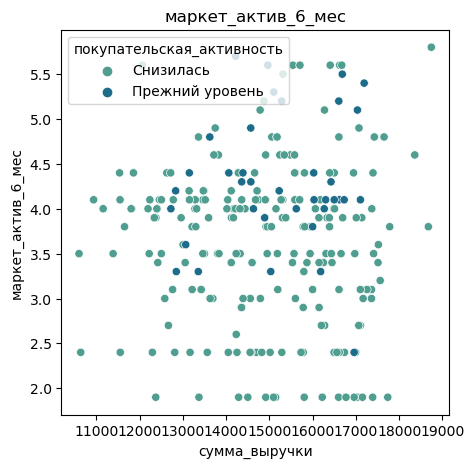

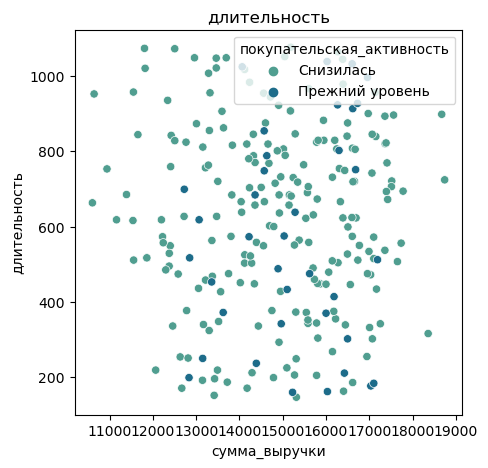

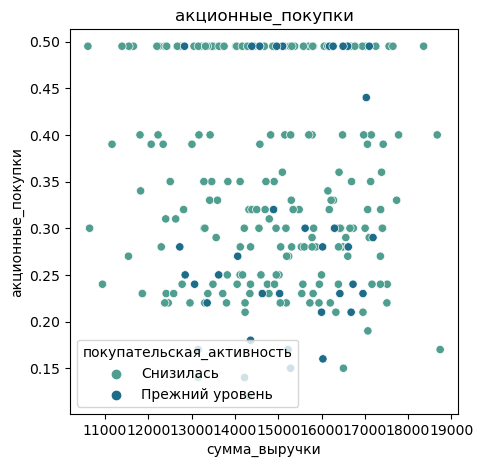

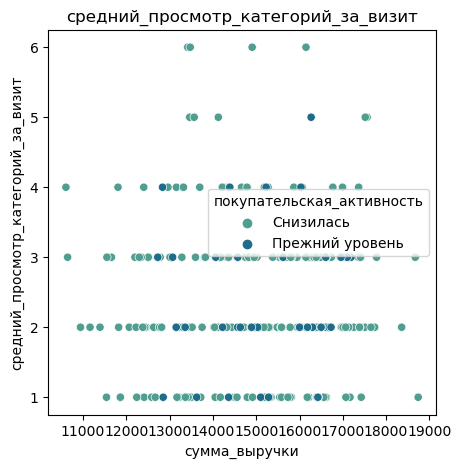

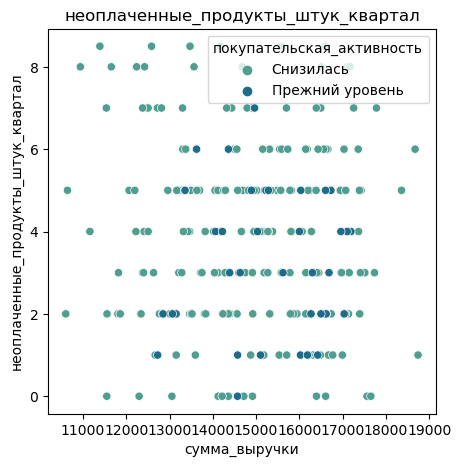

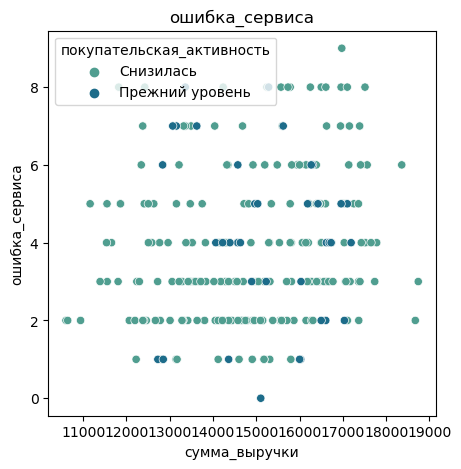

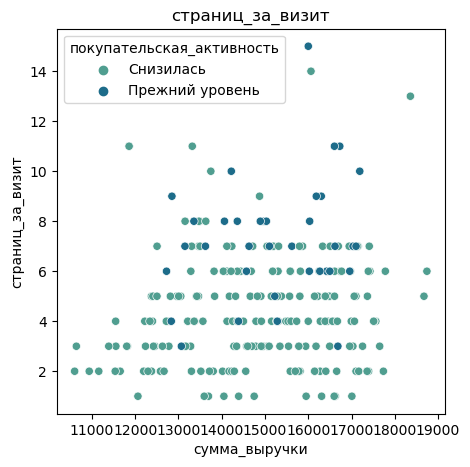

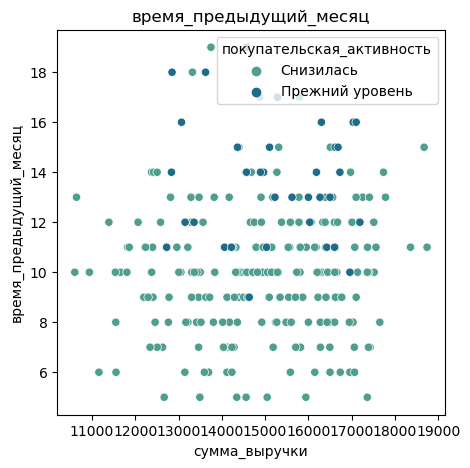

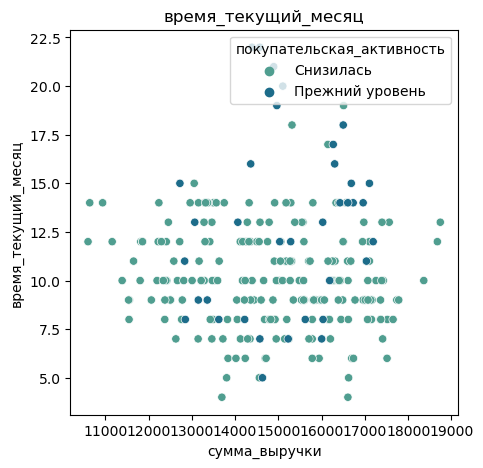

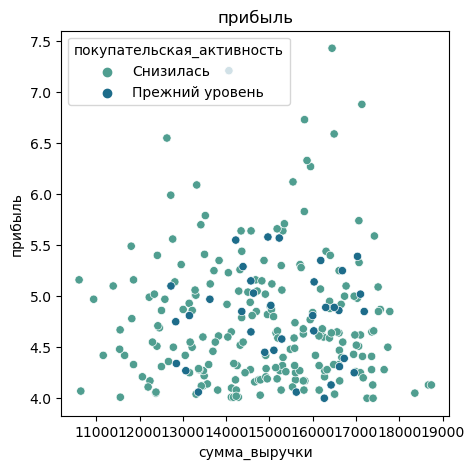

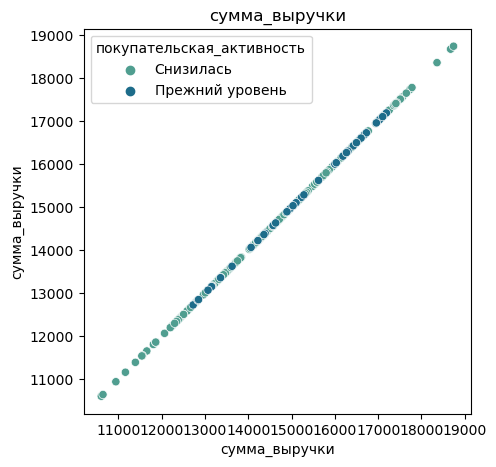

In [72]:

for i in nums:
    scatter(data = segment_one,
       x='сумма_выручки', y=i,hue='покупательская_активность',
        xlabel='сумма_выручки', ylabel=i, title=i)

Пользователи покупающие меньше акционных товаров, просматривающие больше страниц и проводящие много времени в магазине чаще  оказываются в категории `Прежний уровень`


#### Предложения работе с сегментом для увеличения покупательской активности.

Пользователям которые разрешили присылать предложения и принесли большую выручку в предыдущем месяце:
- Присылать актуальные предложения  из разных категорий, т.к. время проведенное время на сайте увеличивает вероятность вернуть категорию `Прежний уровень`
- увеличить маркетинговую активность в следующие 6 месяцев
- возможно предлагать особые предложения на неоплаченные товары -для уменьшения значений этого признака.
- предагать болше акций на Детские товары.

Так же провести работы для уменьшения возникающих ошибок на сайте.


#### сегментация пользователей по категории мелкая бытовая техника.

In [73]:
segment_two= final_data.loc[final_data['популярная_категория']== 'Мелкая бытовая техника и электроника']

In [74]:
segment_two.head()

,оценка_модели,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,время_предыдущий_месяц,время_текущий_месяц,прибыль,сумма_выручки
47,0.783705,215398,Снизилась,премиум,да,3.5,5,882,0.220,Мелкая бытовая техника и электроника,3,2.0,6,3,5,6,4.77,15941.7
116,0.902506,215467,Снизилась,стандарт,да,4.4,4,503,0.495,Мелкая бытовая техника и электроника,2,3.0,3,3,7,13,4.01,14282.3
146,0.853931,215497,Снизилась,премиум,да,5.6,5,719,0.280,Мелкая бытовая техника и электроника,1,2.0,7,1,9,5,4.17,16623.6
158,0.833302,215509,Снизилась,премиум,да,4.0,5,982,0.495,Мелкая бытовая техника и электроника,3,1.0,2,6,8,6,3.14,15444.8
177,0.856717,215528,Снизилась,стандарт,да,4.4,4,773,0.495,Мелкая бытовая техника и электроника,3,3.0,8,6,8,8,3.33,15875.3


----- покупательская_активность -----
покупательская_активность
Прежний уровень    147
Снизилась           27
Name: count, dtype: int64



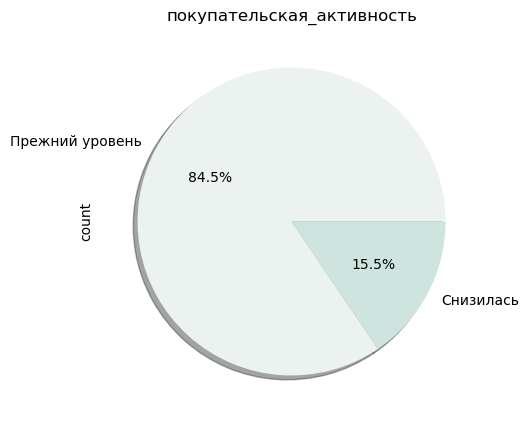

----- тип_сервиса -----
тип_сервиса
стандарт    127
премиум      47
Name: count, dtype: int64



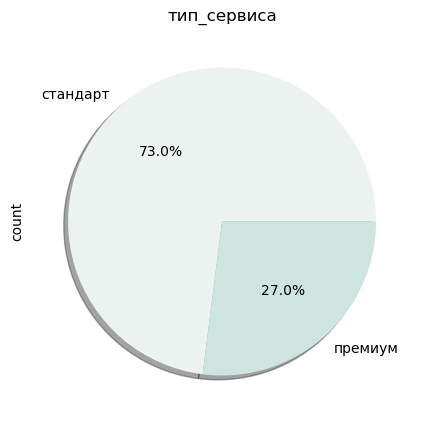

----- разрешить_сообщать -----
разрешить_сообщать
да     127
нет     47
Name: count, dtype: int64



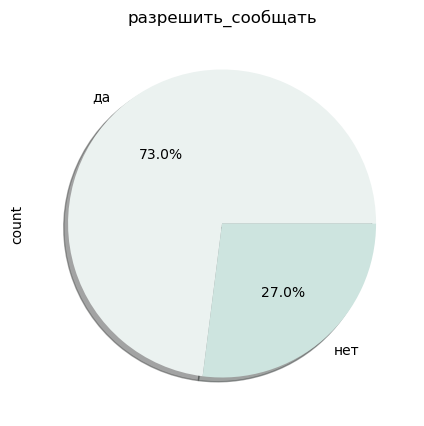

----- маркет_актив_тек_мес -----
маркет_актив_тек_мес
4    101
5     39
3     34
Name: count, dtype: int64



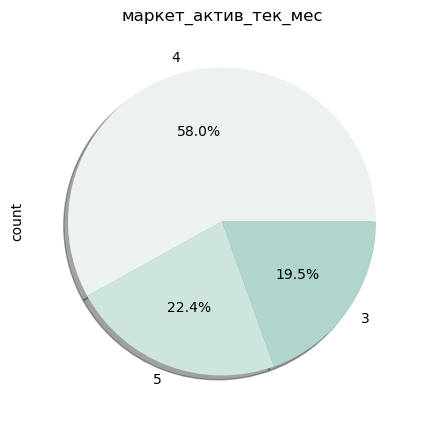

----- популярная_категория -----
популярная_категория
Мелкая бытовая техника и электроника    174
Name: count, dtype: int64



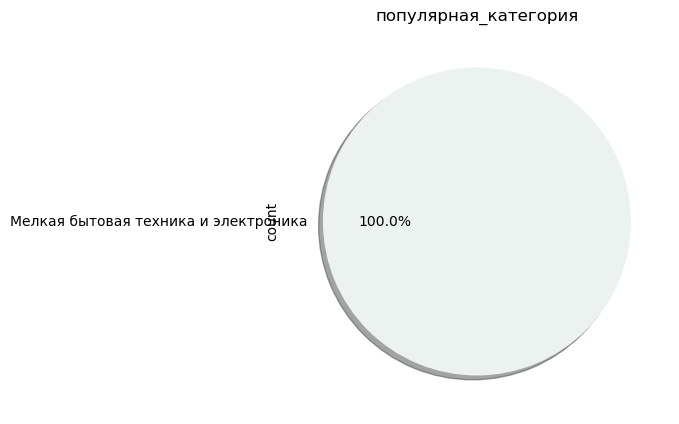

In [75]:
analysis(segment_two, step=1)

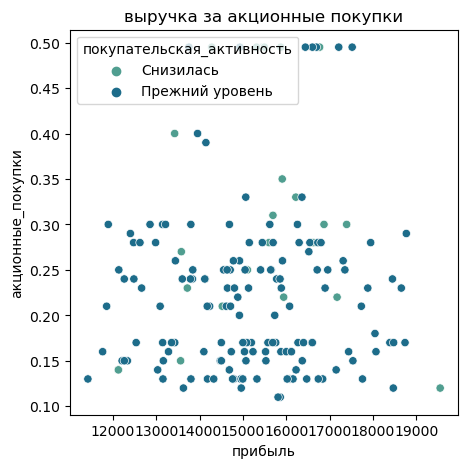

In [76]:
 scatter(data = segment_two,
       x='сумма_выручки', y='акционные_покупки',hue='покупательская_активность',
        xlabel='прибыль', ylabel='акционные_покупки', title='выручка за акционные покупки')

#### Предложения работе с сегментом для увеличения покупательской активности.

Как видим в этом сегменте подавляющее число пользователей имеет категорию `Прежний уровень`.
Для сохранения и увеличения числа пользователей с этой категорией:
- Предлагать больше акций на товары из категории малая бытовая техника.
- увеличить маркетинговую активность в следующие 6 месяцев
- возможно предлагать особые предложения на неоплаченные товары -для уменьшения значений этого признака.
- провести работы для уменьшения возникающих ошибок на сайте.

# Общий вывод

Была задача 
Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.
Были загружены 4 таблицы с данными.


Таблицы были пред обработаны:
- был проведен поиск пропусков, дубликатов явных и не явных.
- имена столбцов были приведены к стандарту.
- изменили тип некоторых столбцов.
-Была проведена работа над дисбалансом классов


Для поиска лучшей модели был построен пай план и объявлены гиперпараметры для четырех моделей  KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC.

С помощью инструмента RandomizedSearchCV была определена лучшая модель и её параметры.
- модель: LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='saga')
- метод масштабирования :MinMaxScaler()
- solver: 'saga',
- penalty: 'l1',
- C': 0.1,


Выводы по работе модели.
1. На вероятность появления у пользователей категории `снизилось` влияют:
- количество Акционных товаров.
- неоплаченные продукты за квартал
2. На вероятность категории `прежний уровень` влияют:
- время проведенное на сервисе
- Средний просмотр категорий за визит
- просмотрт страниц за визит.


Выводы по сегментам пользователей.
- предложить больше маркетинговой активности
- предлагать особые предложения на неоплаченные товары -для уменьшения значений этого признака.
- провести работы для уменьшения возникающих ошибок на сайте.
- Предлагать особые акции на товары из популярной категории.
Общая рекомендация - заинтересовать пользователей проводить больше времени на сайте магазина.
